In [36]:
import numpy as np 
import pandas as pd 
import NewareNDA 
import matplotlib.pyplot as plt 

file_dir = "/Users/wesleychang/OneDrive - Drexel University/Chang Lab/General/Group/Data/Neware/"
# filenames = ["AAT_B-004.ndax", "04102024_AS_C007_Formation.ndax"]
# filenames = ['04102024_AS_C007_Formation.ndax']
filenames = ['05202024_AS_C023_CPDischrg.ndax', '06112024_C024_CPDischrg.ndax', '06112024_AS_C026_CPDischrg.ndax']
# filenames = ['06042024_AS_CC031_Baseline_c5c5.ndax','06052024_AS_CC032_Baselinec5c5.ndax',
            #  '06052024_AS_CC033_Baseline_c5c5.ndax','06052024_AS_CC034_Baseline_c5c3.ndax','06052024_AS_CC035_Baseline_c5c3.ndax',
            #  '06052024_AS_CC040_CPDisrchrg.ndax','06052024_AS_CC041_CPDischrg.ndax','06052024_AS_CC042_CPDischrg.ndax'
            #  ]

# filenames = ['AAT_FEC-002 CYCLING.ndax','AAT_EA-002 CYCLING.ndax','AAT_EP-002 CYCLING.ndax','AAT_MP-002 CYCLING.ndax','AAT_B-015 CYCLING.ndax']
# filenames = ["250021-3-5-191.ndax"]
colors = ['k','k','k','k','k','green', 'orange', '#E0001B']
labels = ['0.25 W','0.42 W','0.84 W']
# labels = ['FEC','EA','EP','MP','Baseline']

def smooth(x,window_len=11,window='flat'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    y = list(y)
    y = y[window_len-1:]

    return np.array(y)

/Users/wesleychang/.local/share/virtualenvs/wesleychang-voY7E120/lib/python3.8/site-packages/NewareNDA/NewareNDAx.py:105: UserWarning: IMPORTANT: This ndax has missing data. The output from NewareNDA contains interpolated data!
  warnings.warn("IMPORTANT: This ndax has missing data. The output from "


Index(['Index', 'Cycle', 'Step', 'Status', 'Time', 'Voltage', 'Current(mA)',
       'Charge_Capacity(mAh)', 'Discharge_Capacity(mAh)', 'Charge_Energy(mWh)',
       'Discharge_Energy(mWh)', 'Timestamp'],
      dtype='object')
-66.026726


/Users/wesleychang/.local/share/virtualenvs/wesleychang-voY7E120/lib/python3.8/site-packages/NewareNDA/NewareNDAx.py:105: UserWarning: IMPORTANT: This ndax has missing data. The output from NewareNDA contains interpolated data!
  warnings.warn("IMPORTANT: This ndax has missing data. The output from "


Index(['Index', 'Cycle', 'Step', 'Status', 'Time', 'Voltage', 'Current(mA)',
       'Charge_Capacity(mAh)', 'Discharge_Capacity(mAh)', 'Charge_Energy(mWh)',
       'Discharge_Energy(mWh)', 'Timestamp'],
      dtype='object')
-111.43922


/Users/wesleychang/.local/share/virtualenvs/wesleychang-voY7E120/lib/python3.8/site-packages/NewareNDA/NewareNDAx.py:105: UserWarning: IMPORTANT: This ndax has missing data. The output from NewareNDA contains interpolated data!
  warnings.warn("IMPORTANT: This ndax has missing data. The output from "


Index(['Index', 'Cycle', 'Step', 'Status', 'Time', 'Voltage', 'Current(mA)',
       'Charge_Capacity(mAh)', 'Discharge_Capacity(mAh)', 'Charge_Energy(mWh)',
       'Discharge_Energy(mWh)', 'Timestamp'],
      dtype='object')
-224.52934


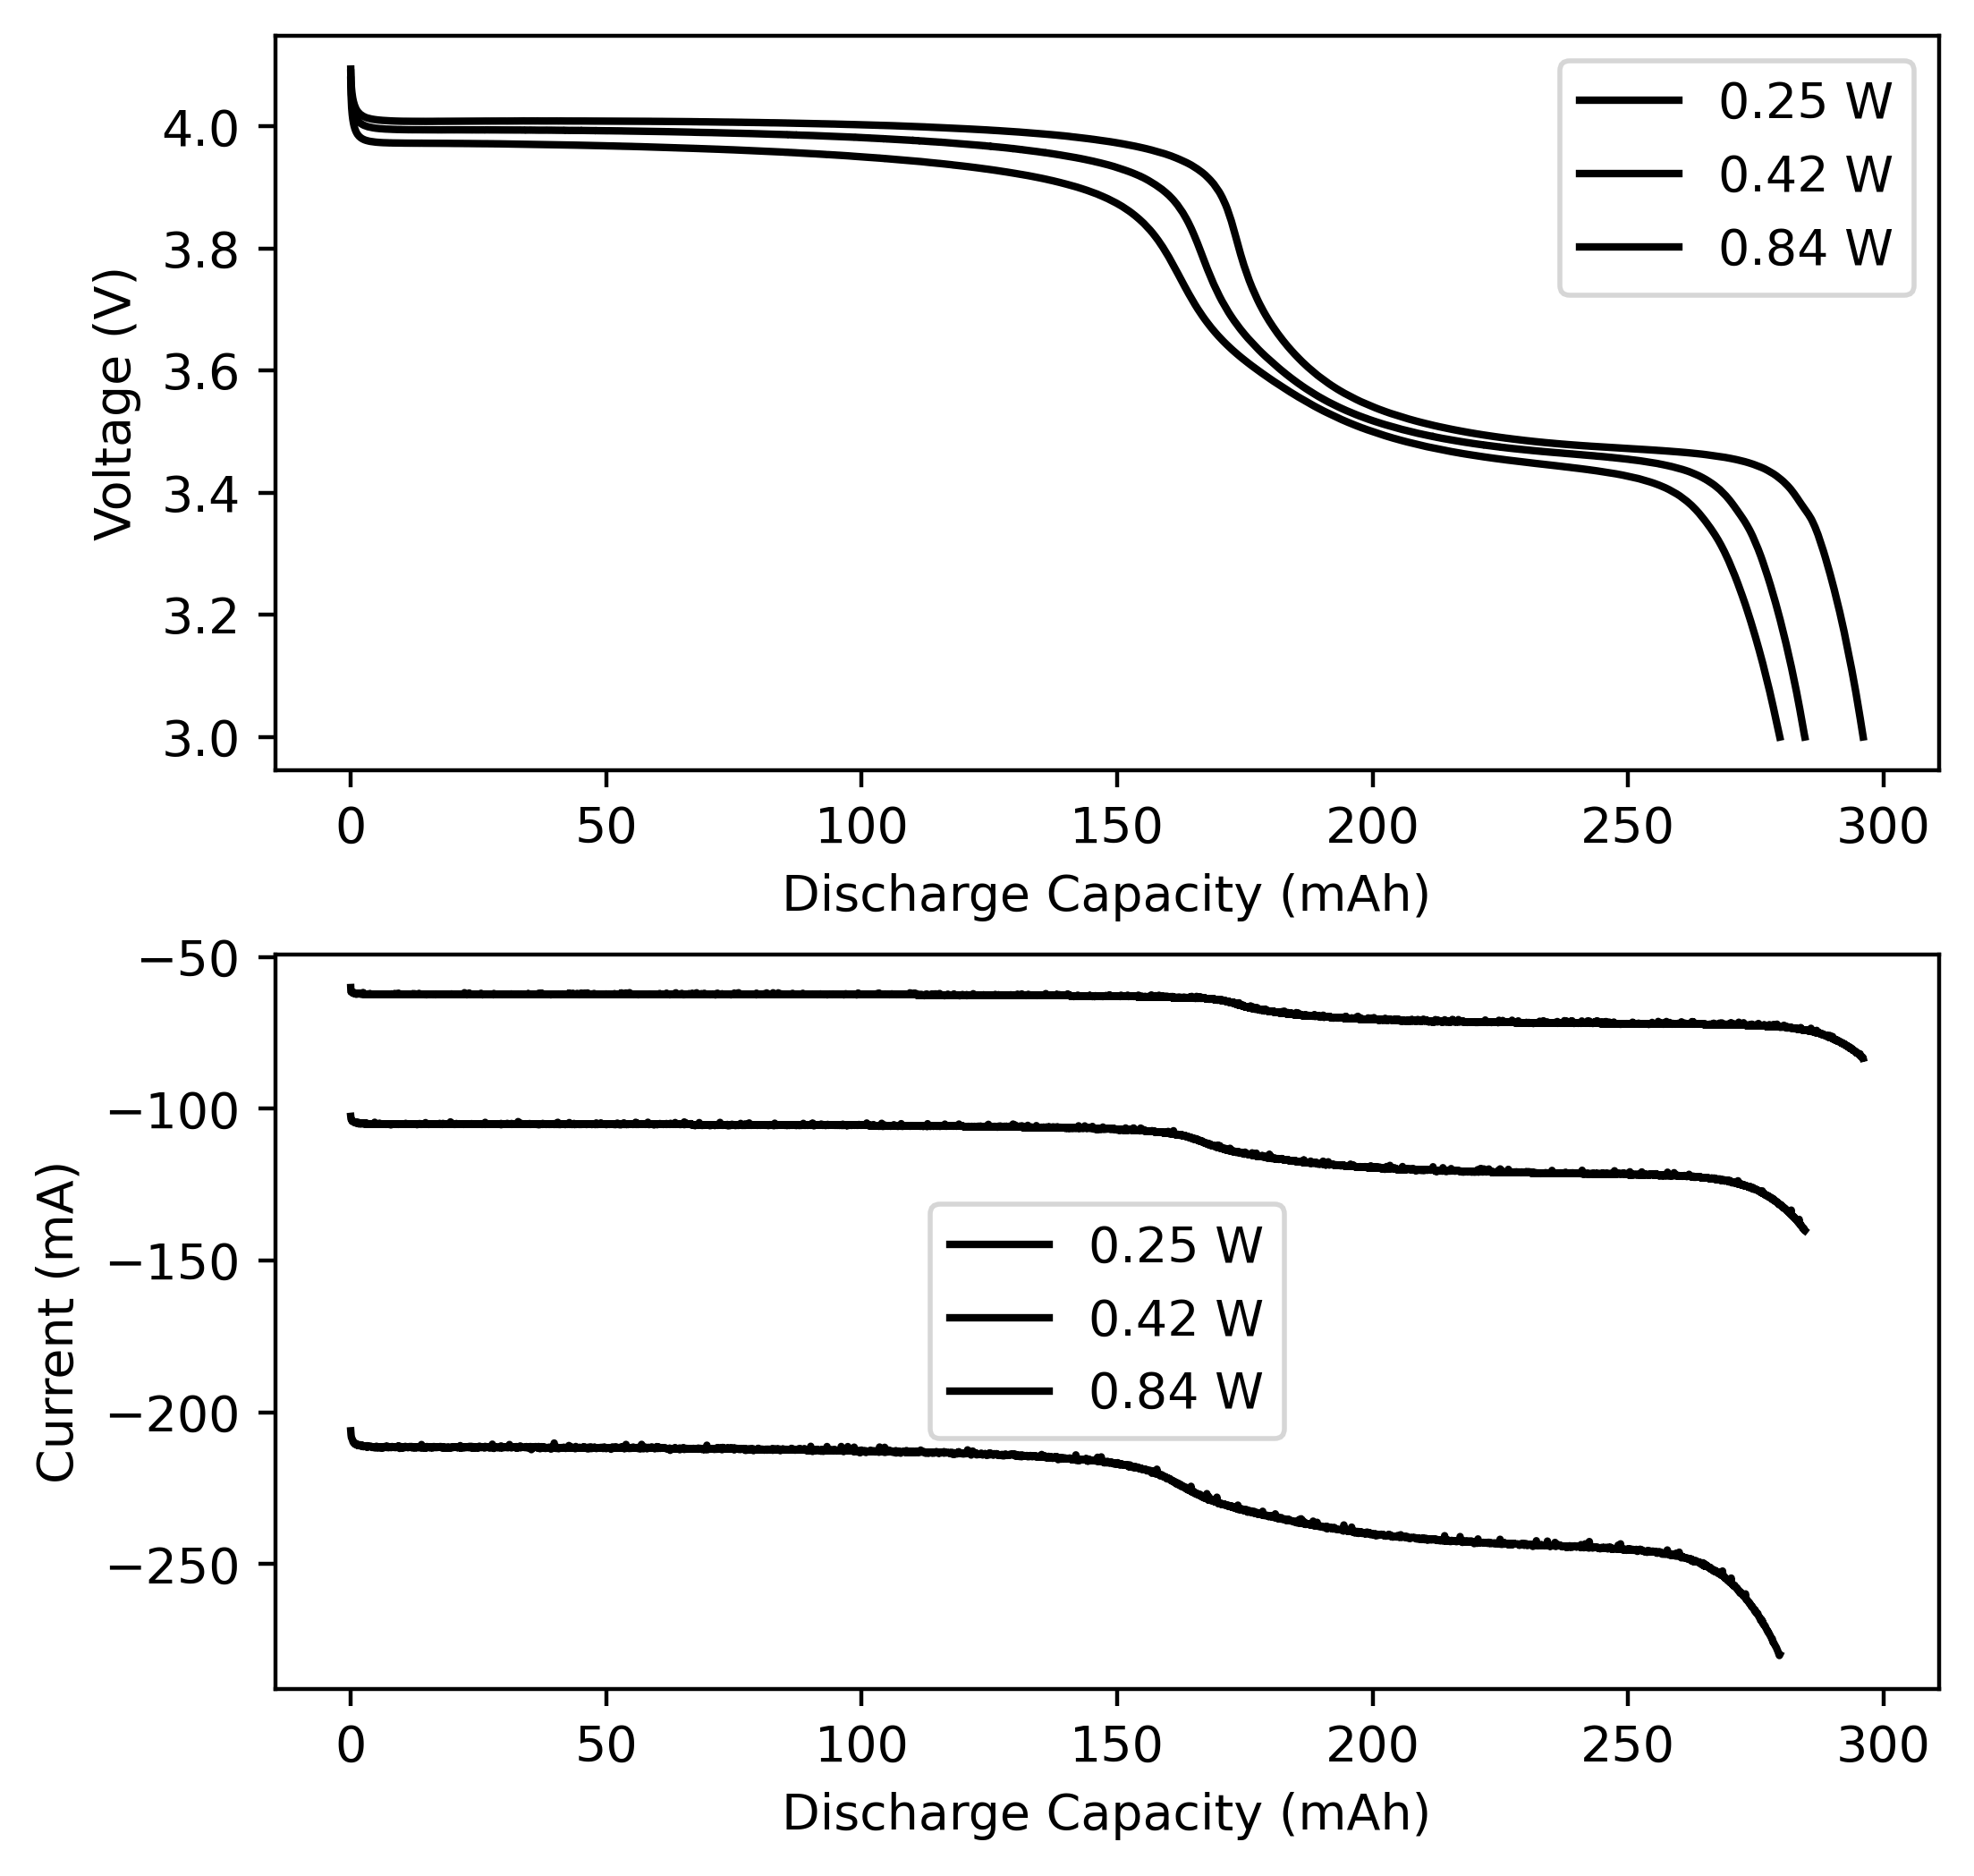

In [40]:
fig1 = plt.figure(dpi=400, figsize = (6,6))
fig1.subplots_adjust(hspace=0.25)
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)
# ax3 = fig1.add_subplot(313)
colormap = plt.get_cmap('coolwarm')

for i,f in enumerate(filenames): 
    df = NewareNDA.read(file_dir+f)
    wl = 100
    # print(len(df))
    print(df.keys())
    # ax1.plot(df[(df['Cycle']==1) & (df['Current(mA)']>0)]['Time']/3600.,df[(df['Cycle']==1) & (df['Current(mA)']>0)]['Voltage'])
    v = df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Voltage']
    cap = df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Discharge_Capacity(mAh)']
    average = np.mean(df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Current(mA)'])
    print(average)
    ax1.plot(df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Discharge_Capacity(mAh)'],df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Voltage'], color=colors[i], label = labels[i])
    ax2.plot(df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Discharge_Capacity(mAh)'],df[(df['Cycle']==1) & (df['Current(mA)']<0)]['Current(mA)'], color=colors[i], label = labels[i])
    # ax1.plot(cap[:-1], smooth(np.diff(v), window_len=wl)/smooth(np.diff(cap), window_len=wl), color=colors[i], label = labels[i])

    # ax2.plot(df[df['Cycle']==1]['Discharge_Capacity(mAh)'],df[df['Cycle']==1]['Current(mA)'], color=colors[i])
    ce = []
    for j, cycle in enumerate(df['Cycle'].unique()):
        filter1 = (df['Cycle']==cycle) & (df['Current(mA)']>0.02)
        # ax1.plot(df[filter1]['Charge_Capacity(mAh)'],df[filter1]['Voltage'], color=colormap(j/len(df['Cycle'].unique())))

        filter2 = (df['Cycle']==cycle) & (df['Current(mA)']<-0.02)
        # ax1.plot(df[filter2]['Discharge_Capacity(mAh)'],df[filter2]['Voltage'], color=colormap(j/len(df['Cycle'].unique())))
        # print(cycle)
        # ax2.scatter(cycle, max(df[df['Cycle']==cycle]['Discharge_Capacity(mAh)']), color=colormap(i/len(filenames)), s=8)


            # print(len(df[df['Cycle']==cycle]['Voltage']))
            # print(len(df[df['Cycle']==cycle]['Time']))
            # print(df[df['Cycle']==cycle]['Voltage'])
        # ax1.plot((df[df['Cycle']==cycle]['Timestamp']-df[df['Cycle']==cycle]['Timestamp'].iloc[0])/3600., df[df['Cycle']==cycle]['Voltage'], color=colors[i])
        
        # ax2.scatter(cycle, max(df[df['Cycle']==cycle]['Charge_Capacity(mAh)']), marker = 'o', s = 10, color=colormap(i/len(filenames)), label = labels[i])
        # ax2.scatter(cycle, max(df[df['Cycle']==cycle]['Discharge_Capacity(mAh)']), marker = 'o', s = 10, facecolors = 'None', color=colormap(i/len(filenames)), label = labels[i])
        # ce.append(100*max(df[df['Cycle']==cycle]['Discharge_Capacity(mAh)'])/max(df[df['Cycle']==cycle]['Charge_Capacity(mAh)']))
        # ax2.scatter(cycle, 100*max(df[df['Cycle']==cycle]['Discharge_Capacity(mAh)'])/max(df[df['Cycle']==cycle]['Charge_Capacity(mAh)']),color=colormap(i/len(filenames)), s = 8)
    # ax2.plot(ce,color=colormap(i/len(filenames)))
# ax2.set_ylim(150, 210)
# ax3.set_ylim(94,101)
ax1.set_xlabel('Discharge Capacity (mAh)')
ax1.set_ylabel('Voltage (V)')
# ax1.set_ylim(-1.5,0)
ax2.legend(loc='best')
ax1.legend(loc='best')
# ax2.set_ylabel('Discharge Capacity (mAh)')
ax2.set_xlabel('Discharge Capacity (mAh)')
ax2.set_ylabel('Current (mA)')
# ax2.set_xlim(0,55)
# ax2.set_ylim(160,220)


# ax3.set_ylabel('Coulombic efficiency (CE%)')
# ax3.set_xlabel('Cycle')
plt.show()